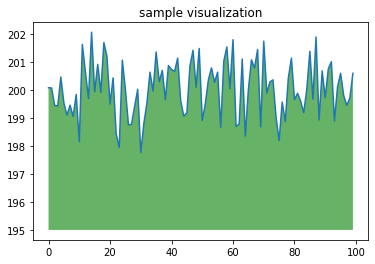

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title('sample visualization')
plt.show()

In [ ]:
# tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_labels)

4423680/4422102 [==============================] - 0s 0us/step
[9 0 0 ... 3 0 5]


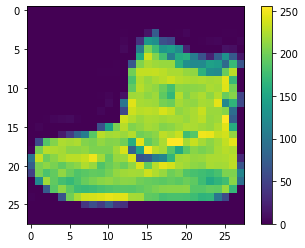

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

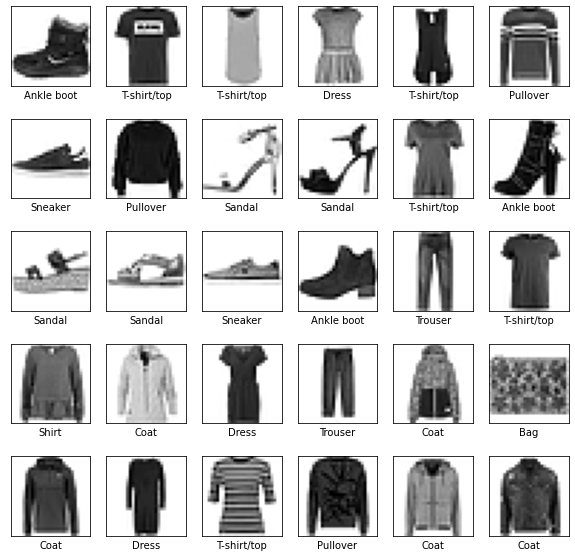

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3011 - accuracy: 0.1091
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2950 - accuracy: 0.1560
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2816 - accuracy: 0.1859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2611 - accuracy: 0.1976
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2337 - accuracy: 0.2040
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2012 - accuracy: 0.2020
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1648 - accuracy: 0.2093
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1270 - accuracy: 0.2115
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.088

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 2.3027 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
print(predictions[0])

[0.05151226 0.08250905 0.05412809 0.06921753 0.04877984 0.1831809
 0.06042171 0.19656742 0.10417125 0.14951196]


In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                      100*np.max(predictions_array),
                      class_names[true_label]),
                      color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

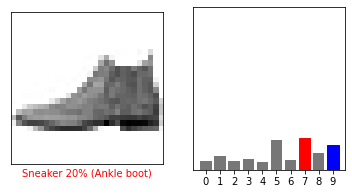

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

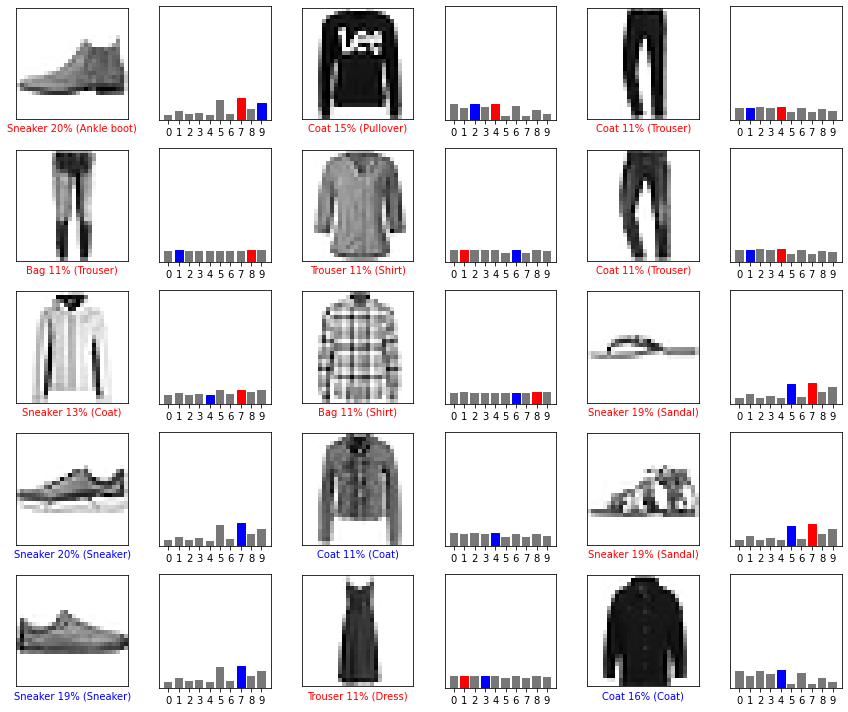

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)


4

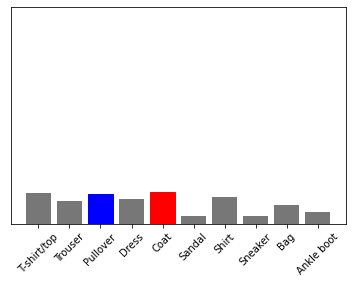

In [ ]:
img = test_images[1]
print(img.shape)
img = (np.expand_dims(img, 0))
img.shape
predictions_single = probability_model.predict(img)
predictions_single
plot_value_array(1,predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])